In [70]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import nengo
%load_ext nengo.ipynb

from adder_env import create_adder_env
from constants import *
%load_ext autoreload

q_list = [(0,0,0,1), (0,0,1,0), (0,1,0,0), (1,0,0,0)]
ans_list = [(-1,1), (1,-1), (1,1), (-1,-1)]

The nengo.ipynb extension is already loaded. To reload it, use:
  %reload_ext nengo.ipynb


In [71]:

with nengo.Network(label="test") as model:
    env = create_adder_env(q_list, ans_list, (1,))

    # questions and op_state are given at the correct interval
    # and are swapped once an answer is given
    q_node = nengo.Node(size_in=D*2)
    op_node = nengo.Node(size_in=1)

    # input is given constantly throughout
    in_node = nengo.Node(size_in=D*2)

    def ans_func(t):
        if t < 0.1:
            return (0, 0)
        elif t < 0.45:
            return (-1,1)
        elif t < 0.6:
            return (0, 0)
        elif t < 0.95:
            return (1,-1)
        elif t < 1.0:
            return (0, 0)
        elif t < 1.35:
            return (1, 1)
        elif t < 1.8:
            return (0, 0)
        elif t < 2.15:
            return (-1, -1)
        elif t < 2.2:
            return (0, 0)
        elif t < 2.55:
            print(env.env_cls.list_index)
            return ans_list[env.env_cls.list_index]
        elif t < 2.6:
            return (0, 0)
        elif t < 2.95:
            return ans_list[env.env_cls.list_index]
        else:
            return (0, 0)

    # answers can be given at different intervals
    ans_in = nengo.Node(ans_func)

    # the correct answer is returned
    ans_out = nengo.Node(size_in=D)

    # learning is maintained for a given interval
    learn_node = nengo.Node(size_in=1)

    # gate is '0' while waiting for answer
    gate_node = nengo.Node(size_in=1)

    nengo.Connection(env.q_in, q_node, synapse=None)
    nengo.Connection(env.op_in, op_node, synapse=None)
    nengo.Connection(env.env_keys, in_node, synapse=None)
    nengo.Connection(ans_in, env.set_ans, synapse=None)
    nengo.Connection(env.get_ans, ans_out, synapse=None)
    nengo.Connection(env.learning, learn_node, synapse=None)
    nengo.Connection(env.gate, gate_node, synapse=None)

    p_q = nengo.Probe(env.q_in, synapse=None)
    p_op = nengo.Probe(env.op_in, synapse=None)
    p_in = nengo.Probe(env.env_keys, synapse=None)
    p_ans = nengo.Probe(env.get_ans, synapse=None)
    p_learn = nengo.Probe(env.learning, synapse=None)
    p_gate = nengo.Probe(env.gate, synapse=None)

    p_in = nengo.Probe(ans_in, synapse=None)

model

<Network "test" at 0x7f7cda5c9110>

In [72]:
sim = nengo.Simulator(model, dt=dt)
sim.run(3.0)
t = sim.trange()

4


IndexError: list index out of range

ValueError: x and y must have same first dimension

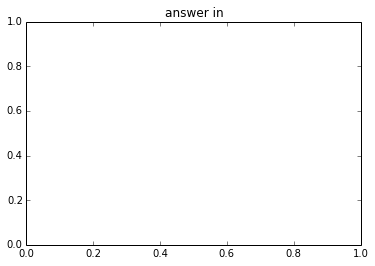

In [65]:
plt.figure()
plt.title("answer in")
plt.plot(t, sim.data[p_in])
plt.ylim(-1.1, 1.1)
plt.figure()
plt.title("answer out and learning")
plt.plot(t, sim.data[p_ans])
plt.ylim(-1.1, 1.1)
plt.plot(t, sim.data[p_learn])

In [30]:
print("what")

what
